## Theory 

First let's try an absorptive bistability. Let's consider the case of identical and lossless mirrors with some finite $R$ and transmittance $T$ and a cavity of length $l$. We'll consider a reflectivity of $R = |r|^2$ and $T = |t|^2$. For the sake of conservation, assuming losslessness, we have $R+T=1$. 

At the boundary stipulated by the first mirror, we will have a field that is given by
\begin{equation}
A_2 = tA_1 + rA'_2
\end{equation}
where $A'_2$ is the light reflecting back from the seond mirror and is given by
\begin{equation}
    A'_2 = rA_2\exp{(2ikl-\alpha l)}.
\end{equation}

This reduces to
\begin{equation}
A_2 = \frac{t A_1}{1-r^2\exp{(2ikl-\alpha l)}}.
\end{equation}

The absorptive coefficient $\alpha$ is the source of nonlinearity. It is a form of intensity independent bistability that is characterized by
\begin{equation}
    \alpha = \frac{\alpha_0}{1+I/I_s}
\end{equation}
where $\alpha_0$ is the low intensity absorption coefficient, $I_s$ is the saturation intensity. 
(https://www.rp-photonics.com/saturable_absorbers.html). 

If we take the mean field approach (homogenous spatial intensity of field in cavity), we have:
\begin{equation}
A_2 = \frac{tA_1}{1-R(1-\alpha l)}
\end{equation}
and by considering the intensity instead of the amplitude given by $I_i = 2n \epsilon_0 |A_i|^2$ where $i=1$ for the incident field and $i=2$ for the circulating field we have
\begin{equation}
I_2 = \frac{T I_1}{(1-R(1-\alpha l))^2}.
\end{equation}

To get the transmitted field, which encodes our matrix after having seen the nonlinear activation function, we have
\begin{equation}
I_3 = \frac{T^2 I_1}{(1-R(1-\alpha l))^2}.
\end{equation}

This is just for the resonant case, where the drive light frequency is on resonance with the cavity frequency. We will be more interested in the general case, since that will give us an additional DoF, the detuning $\delta$. 

For the non-resonant case, the detuning will show up as $r^2\exp{(2ikl)} = r^2e^{i\delta}$. We must then make the replacement:
\begin{equation}
A_2 = \frac{t A_1}{1-r^2e^{(i\delta- \alpha l)}}.
\end{equation}

Subsequently, the relation between $I_1$ and $I_2$ is given to be
\begin{equation}
T I_1 = I_2 \left[ 1 - 2 R \left( 1 - \frac{C_0 T / R}{1 + \frac{2 I_2}{I_s}} \right) \cos \delta + R^2 \left( 1 - \frac{C_0 T / R}{1 + \frac{2 I_2}{I_s}} \right)^2 \right].
\end{equation}
where we have defined the cooperativity $C_0 = \frac{R\alpha_0 l}{1-R}$. Then, we can find the outcoupled transmission to be
\begin{equation}
I_3 = I_2 \left[ 1 - 2 R \left( 1 - \frac{C_0 T / R}{1 + \frac{2 I_2}{I_s}} \right) \cos \delta + R^2 \left( 1 - \frac{C_0 T / R}{1 + \frac{2 I_2}{I_s}} \right)^2 \right].
\end{equation}

In terms of tuneable parameters, we have the detuning and possibly the reflection/transmission if there are some novel solid state technologies out there. We can also pick the material which will have a set $I_s$ and $\alpha_0$, but perhaps there are also novel technologies that allow those to be varied. We ought to look into that.

It should also be noted that the cooperativity $C_0$ can drastically change based off what types of cavities we have access to. I'm not certain what cooperativities are achieved by telecom cavities, so that will need to be researched more.

We can also engineer our cavities to have some explicit baseline T and R

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import root

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

first analyze resonant case
\begin{equation}
I_2 = \frac{T I_1}{(1-R(1-\alpha l))^2}.
\end{equation}

\begin{equation}
I_3 = \frac{T^2 I_1}{(1-R(1-\alpha l))^2}.
\end{equation}

Just to put in numbers, let's consider a quantum well with $\alpha_0 = 600$ cm^-1 and $I_s = 20$ mW/cm^2. Let's also consider a photonic crystal cavity with 2 micron length. We'll also use the cooperativity parameter so that our equations are rewritten to be

\begin{equation}
I_1 = TI_2\left(1+\frac{C_0}{1+2I_2/I_s}\right)^2
\end{equation}
where $C = \frac{C_0}{1+2I_2/I_s}$ and $C_0 = \frac{R\alpha_0 l}{1-R}$.

In [97]:
I_1_arr = np.linspace(0, 200, 2000) # let's work in mW
# start with a highly reflective cavity
R = 0.9
T = 1-R
r = np.sqrt(R)
t = np.sqrt(T)
alpha_0 = 600 #cm-1
I_s = 2 # mW/cm^2
alpha = alpha_0 / (1 + I_1_arr/I_s)
l = 2e-3 #cm

C_0 = R*alpha_0*l/(1-R)
print("cooperativity: ", C_0)


cooperativity:  10.800000000000002


we'll need to solve the transcendental equation for I_2

In [98]:
def solve_I_2(I_1):
    def equation(I_2):
        return T * I_2 * (1 + (C_0 / (1 + (2 * I_2 / I_s))))**2 - I_1
    I2_solution = sp.optimize.fsolve(equation, 0.5)
    return I2_solution[0]

/var/folders/fb/88sx83xj1mqf426gdkwn8ll80000gn/T/ipykernel_18566/1309632119.py:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  I2_solution = sp.optimize.fsolve(equation, 0.5)
/var/folders/fb/88sx83xj1mqf426gdkwn8ll80000gn/T/ipykernel_18566/1309632119.py:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  I2_solution = sp.optimize.fsolve(equation, 0.5)


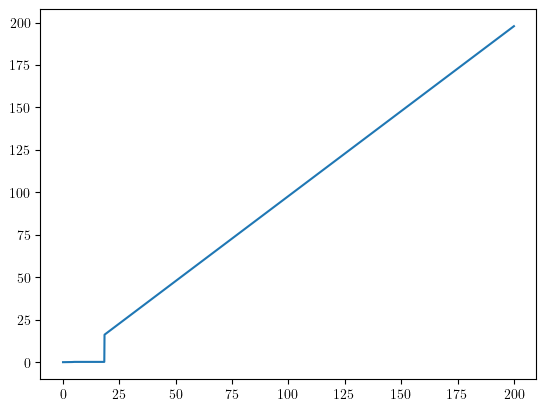

In [99]:
I_2_solutions = np.array([solve_I_2(I_1) for I_1 in I_1_arr])
I_3 = T * I_2_solutions
plt.plot(I_1_arr, I_3)

seems like convergence problems. let's try a more dynamic solver since the dynamic range is super high

In [112]:
def solve_I_2(I_1, C_0):
    def equation(I_2):
        return T * I_2 * (1 + C_0 / (1 + (2 * I_2 / I_s)))**2 - I_1
    
    lower_bound = 1e-6
    upper_bound = 10 + I_1 * 10
    
    try:
        I_2_solution = sp.optimize.brentq(equation, lower_bound, upper_bound)
        return I_2_solution
    except ValueError:
        return np.nan
print(I_1_arr[-1])
I_2_solutions = np.array([solve_I_2(I_1, C_0) for I_1 in I_1_arr])



200.0


Text(0, 0.5, '$I_3 (mW/cm^2)$')

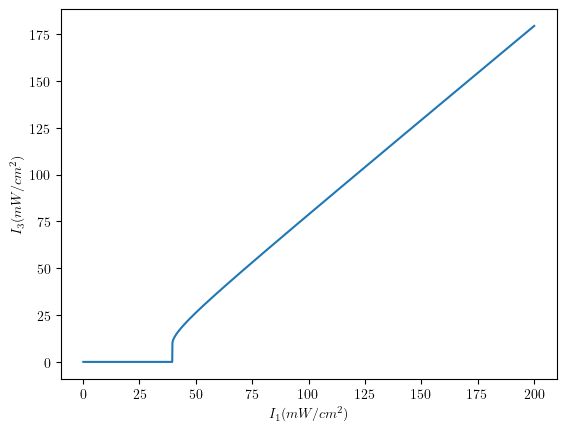

In [113]:
plt.plot(I_1_arr, T*I_2_solutions)
plt.xlabel("$I_1 (mW/cm^2)$")
plt.ylabel("$I_3 (mW/cm^2)$")

convergence seems good. now let's do this for a variety of cooperativity parameters

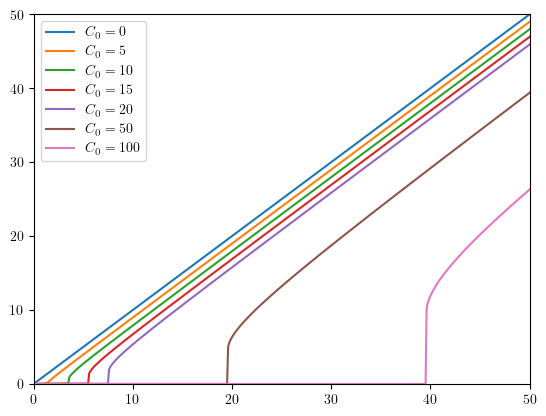

In [114]:
C_0_arr = [0, 5, 10, 15, 20, 50, 100]
for C_0 in C_0_arr:
    I_2_solutions = np.array([solve_I_2(I_1, C_0) for I_1 in I_1_arr])
    plt.plot(I_1_arr, T*I_2_solutions, label=f"$C_0={C_0}$")
plt.legend()
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

it still looks like we are having problems getting multiple roots for the transcendtal equation